# My YouTube Data Science

### 1. Data Management

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import skew
%matplotlib inline 

In [9]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth', None)

In [10]:
df = pd.read_csv("Table data3.csv")

In [11]:
df.head()

Content                                  Video title  \
0        Total                                          NaN   
1  GUKkqPi9mBc                         Meet the BAD demoman   
2  GV1XQrq11R0                              Toxicity in TF2   
3  AY_BGcXtBUs  1 life 32 kills - Road to Godlike Episode 3   
4  6ztl_liionU       { TF2 } DKD destroys a trash talker #5   

  Video publish time  Comments added  Shares  Likes   Views  \
0                NaN             592     351   3304  103714   
1       Jun 15, 2018              43      33    810   24497   
2       Jun 27, 2018              32       3    209    5305   
3        Sep 8, 2016              27       0      3      73   
4       Jan 28, 2018              19       2    110    4456   

   Watch time (hours)  Subscribers  Impressions  \
0           1581.4909          267       633717   
1            442.8763           40       214699   
2            285.7280           20        44848   
3              1.5601            0          212   
4            125.0410           33        46677   

   Impressions click-through rate (%)  
0                                6.91  
1                                9.26  
2                                8.83  
3                               16.04  
4                                7.48

### 2. Data Integration and Transformation

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Content                             256 non-null    object 
 1   Video title                         255 non-null    object 
 2   Video publish time                  235 non-null    object 
 3   Comments added                      256 non-null    int64  
 4   Shares                              256 non-null    int64  
 5   Likes                               256 non-null    int64  
 6   Views                               256 non-null    int64  
 7   Watch time (hours)                  256 non-null    float64
 8   Subscribers                         256 non-null    int64  
 9   Impressions                         256 non-null    int64  
 10  Impressions click-through rate (%)  250 non-null    float64
dtypes: float64(2), int64(6), object(3)
memory usa

In [14]:
df.tail()

Content                                     Video title  \
251  tvZVf3OR4Rc              {TF2} Helltower Halloween contract   
252  uqILfdAbdqE   THAT STUPID GHOST // Corpse Party Ch.2 Part 1   
253  vEUhIqnyau8                              { Tf2 } Close call   
254  w8yhd8mMwjI                          outplay of the century   
255  yl399RgjNiU  I Main Navia Now #shorts #genshinimpact #navia   

    Video publish time  Comments added  Shares  Likes  Views  \
251        Nov 1, 2016               0       0      2     48   
252        Jul 3, 2016               0       0      2     13   
253       Aug 20, 2016               0       0      2     16   
254                NaN               0       0      1      4   
255        Feb 3, 2024               0       0      8    321   

     Watch time (hours)  Subscribers  Impressions  \
251              0.9797            0          491   
252              0.6329            0          154   
253              0.0564            0           26   
254              0.0116            0            0   
255              1.8630            0          178   

     Impressions click-through rate (%)  
251                                4.89  
252                                1.30  
253                                3.85  
254                                 NaN  
255                                3.93

In [15]:
#calculate missing values
df.isnull().sum()/len(df)*100

Content                               0.000000
Video title                           0.390625
Video publish time                    8.203125
Comments added                        0.000000
Shares                                0.000000
Likes                                 0.000000
Views                                 0.000000
Watch time (hours)                    0.000000
Subscribers                           0.000000
Impressions                           0.000000
Impressions click-through rate (%)    2.343750
dtype: float64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Content                             256 non-null    object 
 1   Video title                         255 non-null    object 
 2   Video publish time                  235 non-null    object 
 3   Comments added                      256 non-null    int64  
 4   Shares                              256 non-null    int64  
 5   Likes                               256 non-null    int64  
 6   Views                               256 non-null    int64  
 7   Watch time (hours)                  256 non-null    float64
 8   Subscribers                         256 non-null    int64  
 9   Impressions                         256 non-null    int64  
 10  Impressions click-through rate (%)  250 non-null    float64
dtypes: float64(2), int64(6), object(3)
memory usa

In [17]:
df.dropna(subset=['Video publish time','Impressions click-through rate (%)','Video title'], axis =0,how='any')

Content                                     Video title  \
1    GUKkqPi9mBc                            Meet the BAD demoman   
2    GV1XQrq11R0                                 Toxicity in TF2   
3    AY_BGcXtBUs     1 life 32 kills - Road to Godlike Episode 3   
4    6ztl_liionU          { TF2 } DKD destroys a trash talker #5   
5    lnJnMjd9pio                              Back From the dead   
..           ...                                             ...   
250  tr2VPFQpbc0     FULFILLING MY DREAMS // Hot Throttle Part 2   
251  tvZVf3OR4Rc              {TF2} Helltower Halloween contract   
252  uqILfdAbdqE   THAT STUPID GHOST // Corpse Party Ch.2 Part 1   
253  vEUhIqnyau8                              { Tf2 } Close call   
255  yl399RgjNiU  I Main Navia Now #shorts #genshinimpact #navia   

    Video publish time  Comments added  Shares  Likes  Views  \
1         Jun 15, 2018              43      33    810  24497   
2         Jun 27, 2018              32       3    209   5305   
3          Sep 8, 2016              27       0      3     73   
4         Jan 28, 2018              19       2    110   4456   
5          Jul 2, 2019              16       2      8    164   
..                 ...             ...     ...    ...    ...   
250       Jun 20, 2016               0       0      2     11   
251        Nov 1, 2016               0       0      2     48   
252        Jul 3, 2016               0       0      2     13   
253       Aug 20, 2016               0       0      2     16   
255        Feb 3, 2024               0       0      8    321   

     Watch time (hours)  Subscribers  Impressions  \
1              442.8763           40       214699   
2              285.7280           20        44848   
3                1.5601            0          212   
4              125.0410           33        46677   
5                2.4715            1         1371   
..                  ...          ...          ...   
250              0.1684            0          181   
251              0.9797            0          491   
252              0.6329            0          154   
253              0.0564            0           26   
255              1.8630            0          178   

     Impressions click-through rate (%)  
1                                  9.26  
2                                  8.83  
3                                 16.04  
4                                  7.48  
5                                  8.32  
..                                  ...  
250                                1.66  
251                                4.89  
252                                1.30  
253                                3.85  
255                                3.93  

[235 rows x 11 columns]

In [18]:
df.isnull().sum()/len(df)*100

Content                               0.000000
Video title                           0.390625
Video publish time                    8.203125
Comments added                        0.000000
Shares                                0.000000
Likes                                 0.000000
Views                                 0.000000
Watch time (hours)                    0.000000
Subscribers                           0.000000
Impressions                           0.000000
Impressions click-through rate (%)    2.343750
dtype: float64

In [19]:
df.head()

Content                                  Video title  \
0        Total                                          NaN   
1  GUKkqPi9mBc                         Meet the BAD demoman   
2  GV1XQrq11R0                              Toxicity in TF2   
3  AY_BGcXtBUs  1 life 32 kills - Road to Godlike Episode 3   
4  6ztl_liionU       { TF2 } DKD destroys a trash talker #5   

  Video publish time  Comments added  Shares  Likes   Views  \
0                NaN             592     351   3304  103714   
1       Jun 15, 2018              43      33    810   24497   
2       Jun 27, 2018              32       3    209    5305   
3        Sep 8, 2016              27       0      3      73   
4       Jan 28, 2018              19       2    110    4456   

   Watch time (hours)  Subscribers  Impressions  \
0           1581.4909          267       633717   
1            442.8763           40       214699   
2            285.7280           20        44848   
3              1.5601            0          212   
4            125.0410           33        46677   

   Impressions click-through rate (%)  
0                                6.91  
1                                9.26  
2                                8.83  
3                               16.04  
4                                7.48

In [20]:
df.isnull().sum()/len(df)*100

Content                               0.000000
Video title                           0.390625
Video publish time                    8.203125
Comments added                        0.000000
Shares                                0.000000
Likes                                 0.000000
Views                                 0.000000
Watch time (hours)                    0.000000
Subscribers                           0.000000
Impressions                           0.000000
Impressions click-through rate (%)    2.343750
dtype: float64

In [21]:
df.dropna(subset=['Impressions click-through rate (%)','Video publish time'],axis=0,how='any',inplace=True)

In [22]:
df.isnull().sum()/len(df)*100

Content                               0.0
Video title                           0.0
Video publish time                    0.0
Comments added                        0.0
Shares                                0.0
Likes                                 0.0
Views                                 0.0
Watch time (hours)                    0.0
Subscribers                           0.0
Impressions                           0.0
Impressions click-through rate (%)    0.0
dtype: float64

In [23]:
df.drop(columns = 'Content')

Video title Video publish time  \
1                              Meet the BAD demoman       Jun 15, 2018   
2                                   Toxicity in TF2       Jun 27, 2018   
3       1 life 32 kills - Road to Godlike Episode 3        Sep 8, 2016   
4            { TF2 } DKD destroys a trash talker #5       Jan 28, 2018   
5                                Back From the dead        Jul 2, 2019   
..                                              ...                ...   
250     FULFILLING MY DREAMS // Hot Throttle Part 2       Jun 20, 2016   
251              {TF2} Helltower Halloween contract        Nov 1, 2016   
252   THAT STUPID GHOST // Corpse Party Ch.2 Part 1        Jul 3, 2016   
253                              { Tf2 } Close call       Aug 20, 2016   
255  I Main Navia Now #shorts #genshinimpact #navia        Feb 3, 2024   

     Comments added  Shares  Likes  Views  Watch time (hours)  Subscribers  \
1                43      33    810  24497            442.8763           40   
2                32       3    209   5305            285.7280           20   
3                27       0      3     73              1.5601            0   
4                19       2    110   4456            125.0410           33   
5                16       2      8    164              2.4715            1   
..              ...     ...    ...    ...                 ...          ...   
250               0       0      2     11              0.1684            0   
251               0       0      2     48              0.9797            0   
252               0       0      2     13              0.6329            0   
253               0       0      2     16              0.0564            0   
255               0       0      8    321              1.8630            0   

     Impressions  Impressions click-through rate (%)  
1         214699                                9.26  
2          44848                                8.83  
3            212                               16.04  
4          46677                                7.48  
5           1371                                8.32  
..           ...                                 ...  
250          181                                1.66  
251          491                                4.89  
252          154                                1.30  
253           26                                3.85  
255          178                                3.93  

[235 rows x 10 columns]

In [24]:
df['Video publish time'] = df['Video publish time'].astype("datetime64[ns]")

In [25]:
df.dtypes

Content                                       object
Video title                                   object
Video publish time                    datetime64[ns]
Comments added                                 int64
Shares                                         int64
Likes                                          int64
Views                                          int64
Watch time (hours)                           float64
Subscribers                                    int64
Impressions                                    int64
Impressions click-through rate (%)           float64
dtype: object

In [26]:
df['Engagement'] = df['Likes'] + df['Shares']+df['Comments added']

In [27]:
df.head()

Content                                  Video title  \
1  GUKkqPi9mBc                         Meet the BAD demoman   
2  GV1XQrq11R0                              Toxicity in TF2   
3  AY_BGcXtBUs  1 life 32 kills - Road to Godlike Episode 3   
4  6ztl_liionU       { TF2 } DKD destroys a trash talker #5   
5  lnJnMjd9pio                           Back From the dead   

  Video publish time  Comments added  Shares  Likes  Views  \
1         2018-06-15              43      33    810  24497   
2         2018-06-27              32       3    209   5305   
3         2016-09-08              27       0      3     73   
4         2018-01-28              19       2    110   4456   
5         2019-07-02              16       2      8    164   

   Watch time (hours)  Subscribers  Impressions  \
1            442.8763           40       214699   
2            285.7280           20        44848   
3              1.5601            0          212   
4            125.0410           33        46677   
5              2.4715            1         1371   

   Impressions click-through rate (%)  Engagement  
1                                9.26         886  
2                                8.83         244  
3                               16.04          30  
4                                7.48         131  
5                                8.32          26

In [28]:
df['Year'] = df['Video publish time'].dt.year

In [29]:
df.head()

Content                                  Video title  \
1  GUKkqPi9mBc                         Meet the BAD demoman   
2  GV1XQrq11R0                              Toxicity in TF2   
3  AY_BGcXtBUs  1 life 32 kills - Road to Godlike Episode 3   
4  6ztl_liionU       { TF2 } DKD destroys a trash talker #5   
5  lnJnMjd9pio                           Back From the dead   

  Video publish time  Comments added  Shares  Likes  Views  \
1         2018-06-15              43      33    810  24497   
2         2018-06-27              32       3    209   5305   
3         2016-09-08              27       0      3     73   
4         2018-01-28              19       2    110   4456   
5         2019-07-02              16       2      8    164   

   Watch time (hours)  Subscribers  Impressions  \
1            442.8763           40       214699   
2            285.7280           20        44848   
3              1.5601            0          212   
4            125.0410           33        46677   
5              2.4715            1         1371   

   Impressions click-through rate (%)  Engagement  Year  
1                                9.26         886  2018  
2                                8.83         244  2018  
3                               16.04          30  2016  
4                                7.48         131  2018  
5                                8.32          26  2019

## 3. Data Visualization

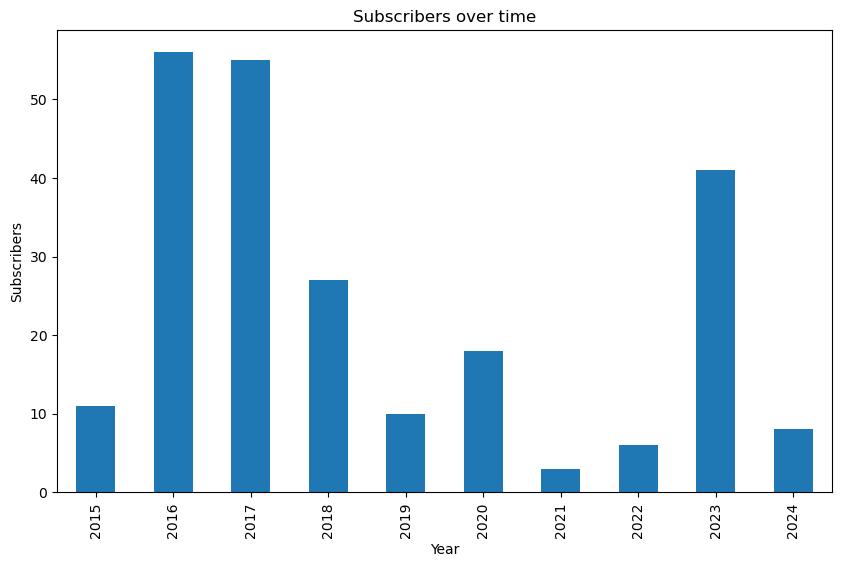

In [31]:
df_bar = df.groupby(df['Year'])['Subscribers'].size()

plt.figure(figsize=(10,6))
df_bar.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Subscribers')
plt.title('Subscribers over time')
plt.savefig('Subs over time.png')
plt.show()


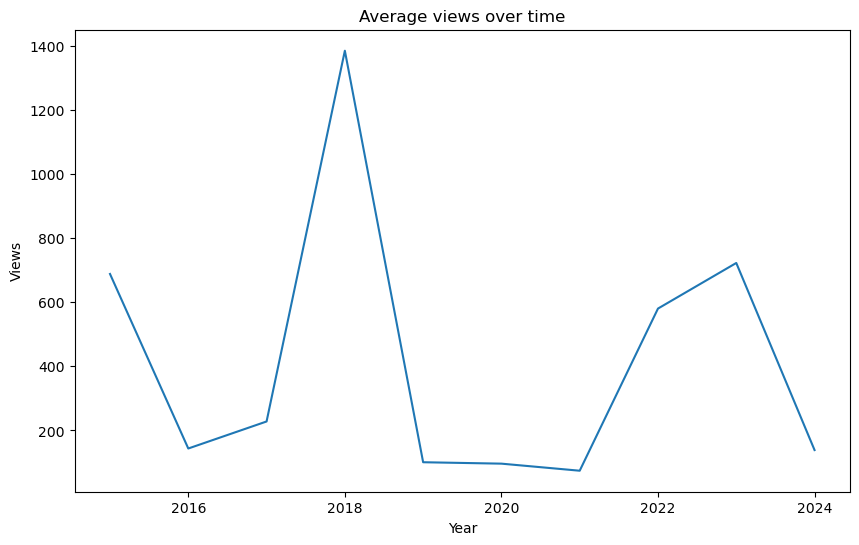

In [32]:
df_line = df.groupby(df['Year'])['Views'].mean()

plt.figure(figsize=(10,6))
df_line.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Views')
plt.title('Average views over time')
plt.savefig('Average views over time.png')
plt.show()


In [33]:
df['Video title'] = df['Video title'].str.replace('\W','',regex=True)

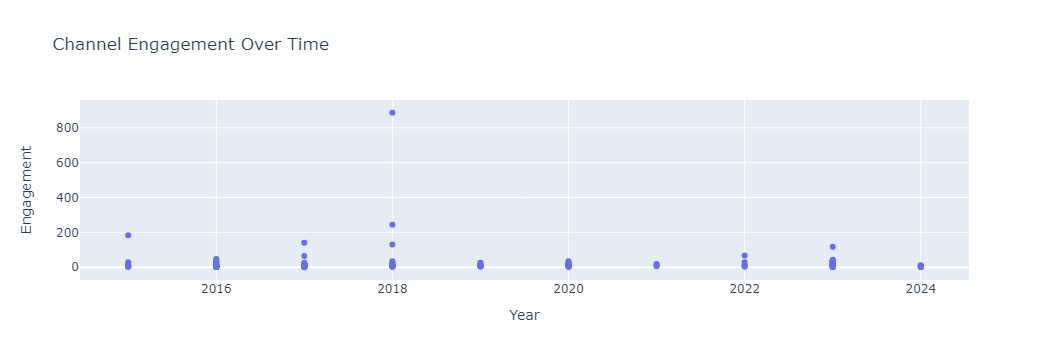

In [34]:
scat_fig = px.scatter(df,x='Year',y='Engagement',
                     labels = {'Year':'Year',
                               'Engagements':'Engagement'},
                               title = 'Channel Engagement Over Time'
                         )
scat_fig.show()

In [35]:
pd.to_datetime(df.Year,format='%Y')

1     2018-01-01
2     2018-01-01
3     2016-01-01
4     2018-01-01
5     2019-01-01
         ...    
250   2016-01-01
251   2016-01-01
252   2016-01-01
253   2016-01-01
255   2024-01-01
Name: Year, Length: 235, dtype: datetime64[ns]

In [36]:
df.head()

Content                        Video title Video publish time  \
1  GUKkqPi9mBc                  MeettheBADdemoman         2018-06-15   
2  GV1XQrq11R0                      ToxicityinTF2         2018-06-27   
3  AY_BGcXtBUs  1life32killsRoadtoGodlikeEpisode3         2016-09-08   
4  6ztl_liionU        TF2DKDdestroysatrashtalker5         2018-01-28   
5  lnJnMjd9pio                    BackFromthedead         2019-07-02   

   Comments added  Shares  Likes  Views  Watch time (hours)  Subscribers  \
1              43      33    810  24497            442.8763           40   
2              32       3    209   5305            285.7280           20   
3              27       0      3     73              1.5601            0   
4              19       2    110   4456            125.0410           33   
5              16       2      8    164              2.4715            1   

   Impressions  Impressions click-through rate (%)  Engagement  Year  
1       214699                                9.26         886  2018  
2        44848                                8.83         244  2018  
3          212                               16.04          30  2016  
4        46677                                7.48         131  2018  
5         1371                                8.32          26  2019

In [37]:
df.dtypes

Content                                       object
Video title                                   object
Video publish time                    datetime64[ns]
Comments added                                 int64
Shares                                         int64
Likes                                          int64
Views                                          int64
Watch time (hours)                           float64
Subscribers                                    int64
Impressions                                    int64
Impressions click-through rate (%)           float64
Engagement                                     int64
Year                                           int32
dtype: object

In [38]:
df = df.sort_values(["Video publish time"])

In [39]:
df.tail()

Content  \
176  8D9dD5IMD7w   
51   A4G2_fE9dBo   
187  JjYWjNFLNE4   
219  csWupl4575g   
142  jdKSarXQfQk   

                                                        Video title  \
176  GoofyAhhImpactshortsgenshinimpactgenshinmemesgenshinimpactedit   
51              DerSahyoonsFaceAParodyofDerFuhrersFacefreepalestine   
187                               historypalestinememesshortsisrael   
219                                                  demomanmontage   
142                                       TF2SkyHighADemomanMontage   

    Video publish time  Comments added  Shares  Likes  Views  \
176         2024-03-04               0       0      2      4   
51          2024-03-09               3       2      0     21   
187         2024-03-13               0       1      5    475   
219         2024-04-25               0       0      1      6   
142         2024-04-25               1       5      6     54   

     Watch time (hours)  Subscribers  Impressions  \
176              0.0199            0           21   
51               0.3274            0         1138   
187              1.2491            1           61   
219              0.0183            0           85   
142              0.5252            1         1907   

     Impressions click-through rate (%)  Engagement  Year  
176                                4.76           2  2024  
51                                 0.62           5  2024  
187                                4.92           6  2024  
219                                2.35           1  2024  
142                                1.89          12  2024

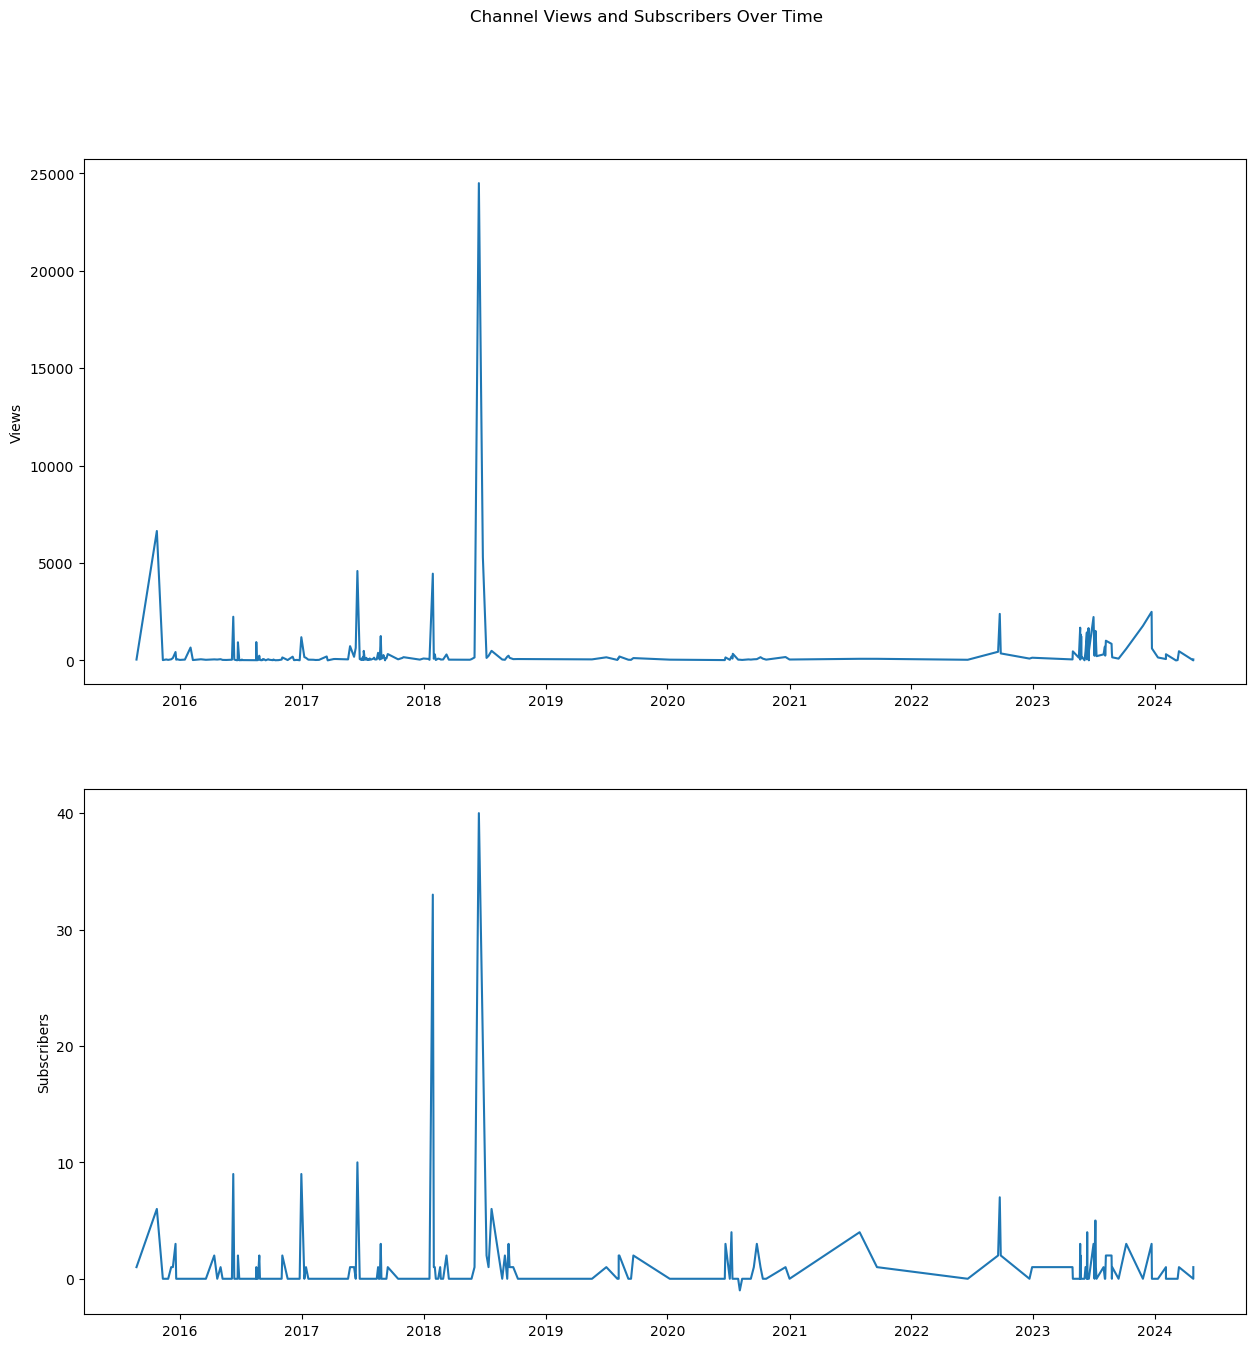

In [40]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(15,15))
fig.suptitle("Channel Views and Subscribers Over Time")
ax1.plot(df['Video publish time'],df['Views'])
ax1.set_ylabel('Views')
ax2.plot(df['Video publish time'],df['Subscribers'])
ax2.set_ylabel('Subscribers')
fig.savefig('subplot.png')

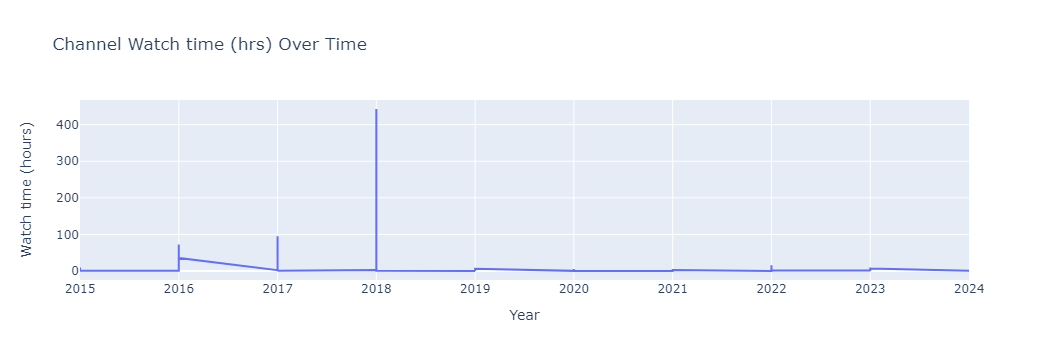

In [41]:
line_fig = px.line(df,x='Year',y='Watch time (hours)',
                     labels = {'Video publish time':'Year',
                               'Watch time (hr)':'Watch time (hours)'},
                               title = 'Channel Watch time (hrs) Over Time'
                         )
line_fig.show()

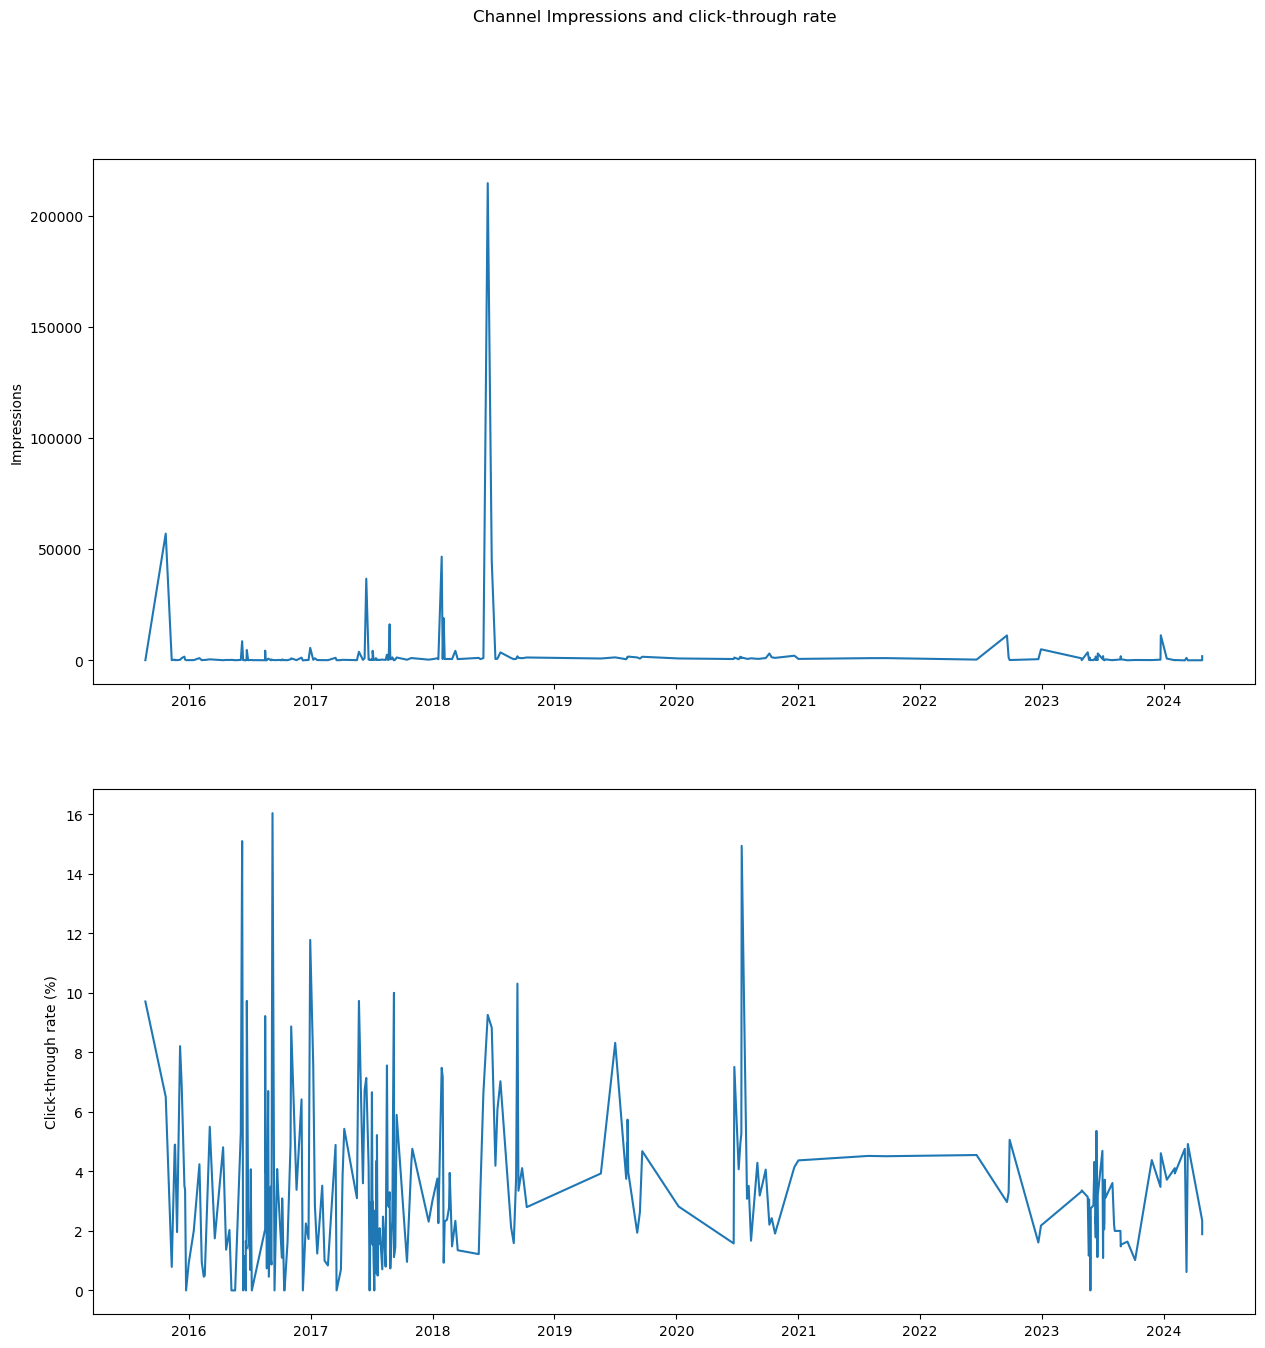

In [42]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(15,15))
fig.suptitle("Channel Impressions and click-through rate")
ax1.plot(df['Video publish time'],df['Impressions'])
ax1.set_ylabel('Impressions')
ax2.plot(df['Video publish time'],df['Impressions click-through rate (%)'])
ax2.set_ylabel('Click-through rate (%)')
fig.savefig('subplot2.png')

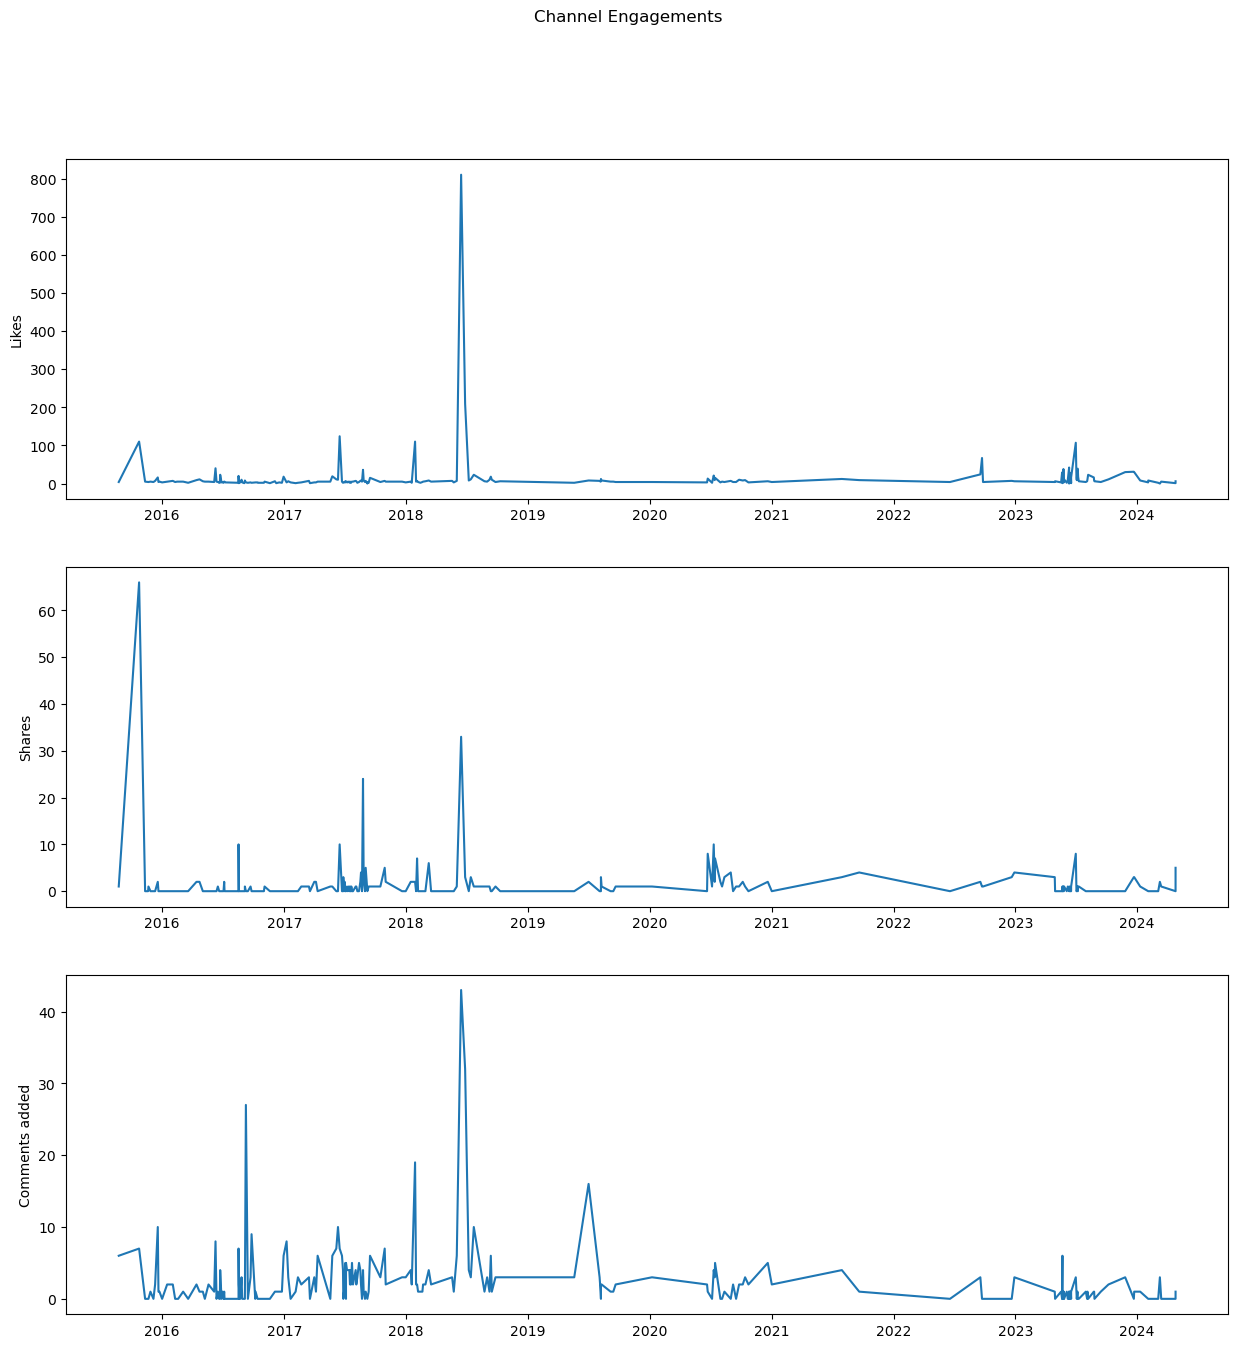

In [43]:
fig,(ax1,ax2,ax3) = plt.subplots(3,figsize=(15,15))
fig.suptitle("Channel Engagements")
ax1.plot(df['Video publish time'],df['Likes'])
ax1.set_ylabel('Likes')
ax2.plot(df['Video publish time'],df['Shares'])
ax2.set_ylabel('Shares')
ax3.plot(df['Video publish time'],df['Comments added'])
ax3.set_ylabel('Comments added')
fig.savefig('subplot3.png')

## 4. Model Building and Evaluation

### 4.1 Model Building

In [46]:
df.sort_index()

Content                            Video title Video publish time  \
1    GUKkqPi9mBc                      MeettheBADdemoman         2018-06-15   
2    GV1XQrq11R0                          ToxicityinTF2         2018-06-27   
3    AY_BGcXtBUs      1life32killsRoadtoGodlikeEpisode3         2016-09-08   
4    6ztl_liionU            TF2DKDdestroysatrashtalker5         2018-01-28   
5    lnJnMjd9pio                        BackFromthedead         2019-07-02   
..           ...                                    ...                ...   
250  tr2VPFQpbc0     FULFILLINGMYDREAMSHotThrottlePart2         2016-06-20   
251  tvZVf3OR4Rc          TF2HelltowerHalloweencontract         2016-11-01   
252  uqILfdAbdqE     THATSTUPIDGHOSTCorpsePartyCh2Part1         2016-07-03   
253  vEUhIqnyau8                           Tf2Closecall         2016-08-20   
255  yl399RgjNiU  IMainNaviaNowshortsgenshinimpactnavia         2024-02-03   

     Comments added  Shares  Likes  Views  Watch time (hours)  Subscribers  \
1                43      33    810  24497            442.8763           40   
2                32       3    209   5305            285.7280           20   
3                27       0      3     73              1.5601            0   
4                19       2    110   4456            125.0410           33   
5                16       2      8    164              2.4715            1   
..              ...     ...    ...    ...                 ...          ...   
250               0       0      2     11              0.1684            0   
251               0       0      2     48              0.9797            0   
252               0       0      2     13              0.6329            0   
253               0       0      2     16              0.0564            0   
255               0       0      8    321              1.8630            0   

     Impressions  Impressions click-through rate (%)  Engagement  Year  
1         214699                                9.26         886  2018  
2          44848                                8.83         244  2018  
3            212                               16.04          30  2016  
4          46677                                7.48         131  2018  
5           1371                                8.32          26  2019  
..           ...                                 ...         ...   ...  
250          181                                1.66           2  2016  
251          491                                4.89           2  2016  
252          154                                1.30           2  2016  
253           26                                3.85           2  2016  
255          178                                3.93           8  2024  

[235 rows x 13 columns]

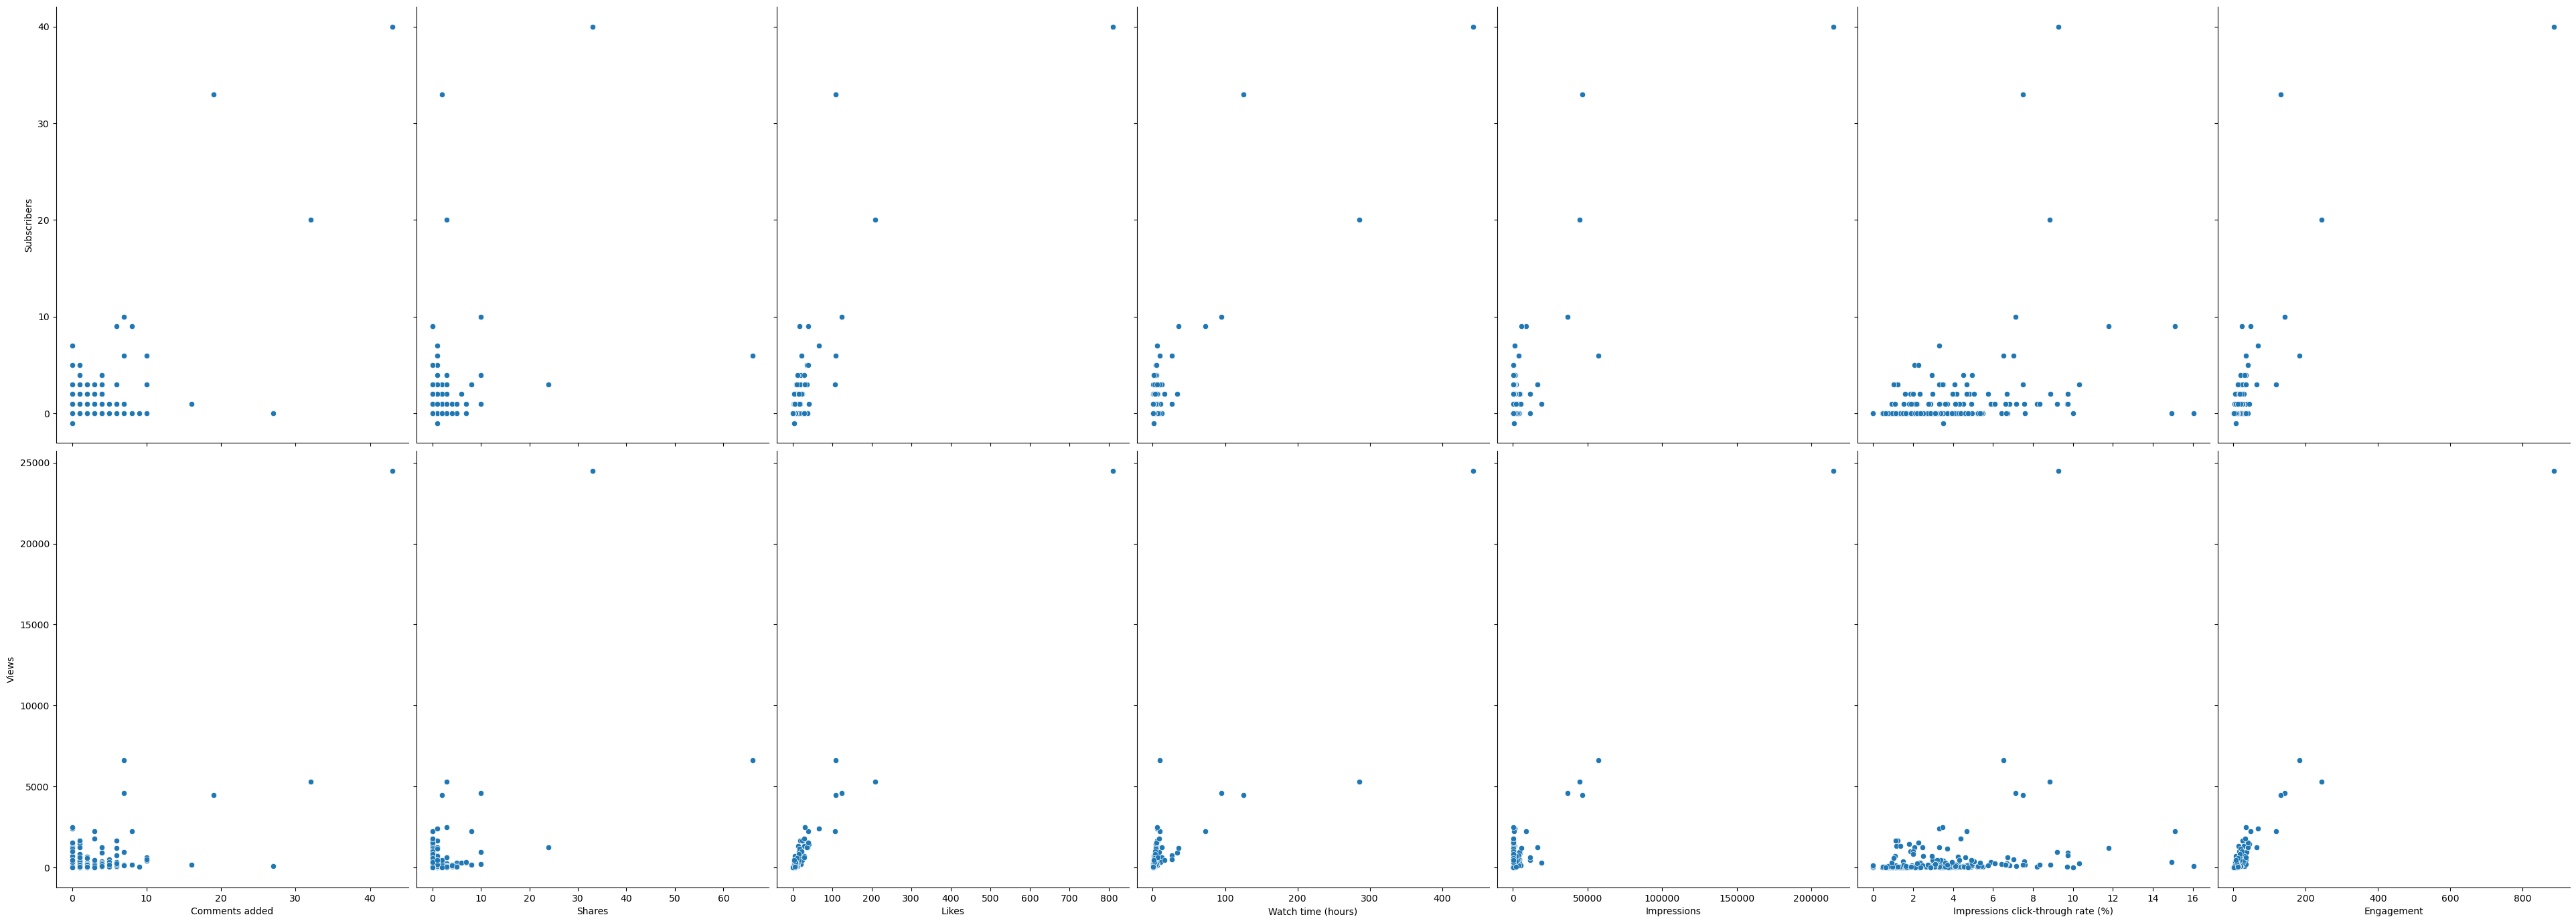

In [47]:
rel_plot = sns.pairplot(df,x_vars=['Comments added','Shares','Likes','Watch time (hours)','Impressions','Impressions click-through rate (%)','Engagement'],y_vars=['Subscribers','Views'],height=7, aspect =0.8)
rel_plot.savefig("relationships.png")

In [48]:
df = df.drop('Video publish time',axis=1)

In [49]:
df['Comments added'] = df['Comments added'].replace(' ', '')

In [50]:
df.sort_index()

Content                            Video title  Comments added  \
1    GUKkqPi9mBc                      MeettheBADdemoman              43   
2    GV1XQrq11R0                          ToxicityinTF2              32   
3    AY_BGcXtBUs      1life32killsRoadtoGodlikeEpisode3              27   
4    6ztl_liionU            TF2DKDdestroysatrashtalker5              19   
5    lnJnMjd9pio                        BackFromthedead              16   
..           ...                                    ...             ...   
250  tr2VPFQpbc0     FULFILLINGMYDREAMSHotThrottlePart2               0   
251  tvZVf3OR4Rc          TF2HelltowerHalloweencontract               0   
252  uqILfdAbdqE     THATSTUPIDGHOSTCorpsePartyCh2Part1               0   
253  vEUhIqnyau8                           Tf2Closecall               0   
255  yl399RgjNiU  IMainNaviaNowshortsgenshinimpactnavia               0   

     Shares  Likes  Views  Watch time (hours)  Subscribers  Impressions  \
1        33    810  24497            442.8763           40       214699   
2         3    209   5305            285.7280           20        44848   
3         0      3     73              1.5601            0          212   
4         2    110   4456            125.0410           33        46677   
5         2      8    164              2.4715            1         1371   
..      ...    ...    ...                 ...          ...          ...   
250       0      2     11              0.1684            0          181   
251       0      2     48              0.9797            0          491   
252       0      2     13              0.6329            0          154   
253       0      2     16              0.0564            0           26   
255       0      8    321              1.8630            0          178   

     Impressions click-through rate (%)  Engagement  Year  
1                                  9.26         886  2018  
2                                  8.83         244  2018  
3                                 16.04          30  2016  
4                                  7.48         131  2018  
5                                  8.32          26  2019  
..                                  ...         ...   ...  
250                                1.66           2  2016  
251                                4.89           2  2016  
252                                1.30           2  2016  
253                                3.85           2  2016  
255                                3.93           8  2024  

[235 rows x 12 columns]

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 24 to 142
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Content                             235 non-null    object 
 1   Video title                         235 non-null    object 
 2   Comments added                      235 non-null    int64  
 3   Shares                              235 non-null    int64  
 4   Likes                               235 non-null    int64  
 5   Views                               235 non-null    int64  
 6   Watch time (hours)                  235 non-null    float64
 7   Subscribers                         235 non-null    int64  
 8   Impressions                         235 non-null    int64  
 9   Impressions click-through rate (%)  235 non-null    float64
 10  Engagement                          235 non-null    int64  
 11  Year                                235 non-null 

In [52]:
X = df[['Comments added','Shares','Likes','Watch time (hours)','Impressions','Impressions click-through rate (%)','Engagement']]
Y = df['Subscribers']

lm1 = LinearRegression()
lm1.fit(X,Y)

LinearRegression()

In [53]:
print(lm1.intercept_)

0.06403065005342357


In [54]:
print(lm1.coef_)

[ 1.84502101e-02  2.62023848e-03 -1.73468895e-02  7.49435522e-02
  8.82666561e-05  1.17098415e-01  3.72355910e-03]


In [55]:
list(zip(['Comments added','Shares','Likes','Watch time (hours)','Impressions','Impressions click-through rate (%)','Engagement'],lm1.coef_))

[('Comments added', 0.01845021012642218),
 ('Shares', 0.0026202384772721896),
 ('Likes', -0.01734688950850762),
 ('Watch time (hours)', 0.07494355223264257),
 ('Impressions', 8.8266656114643e-05),
 ('Impressions click-through rate (%)', 0.11709841498796901),
 ('Engagement', 0.0037235590951811147)]

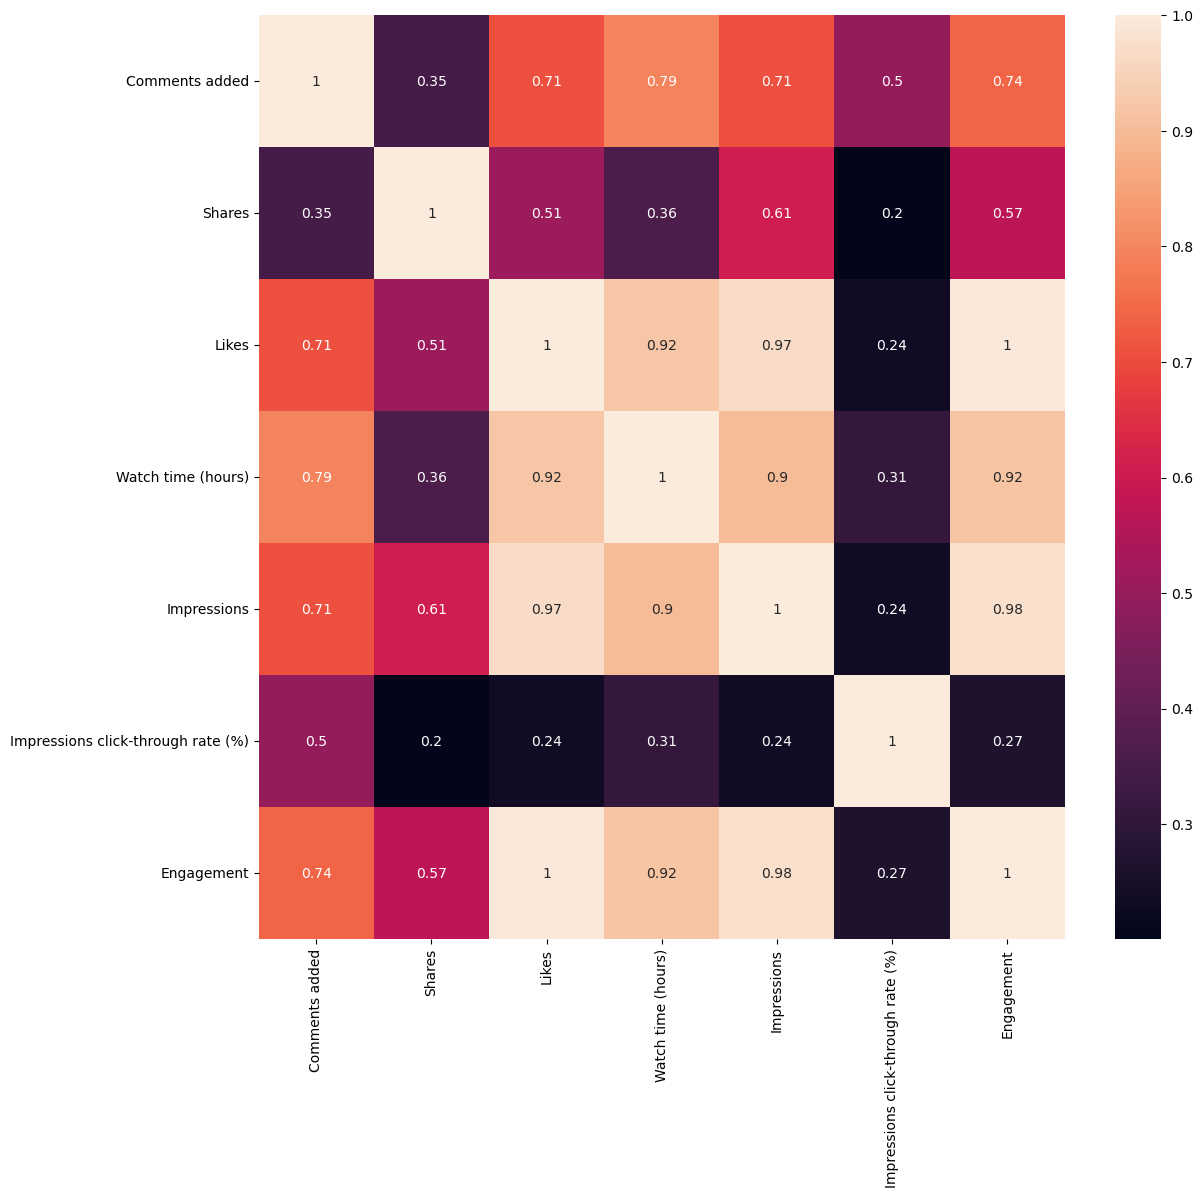

In [56]:
plt.figure(figsize=(13,12))
heat = sns.heatmap(df[['Comments added','Shares','Likes','Watch time (hours)','Impressions','Impressions click-through rate (%)','Engagement']].corr(), annot = True)
results_path = 'results.png'
plt.savefig(results_path)

In [57]:
#make new model predictior with 'comments added' added in the features
from sklearn.metrics import r2_score

#fit new model with chosen features
lm2 = LinearRegression().fit(X[['Comments added','Shares','Likes','Watch time (hours)','Impressions','Impressions click-through rate (%)','Engagement']],Y)

#predict
lm2_pred = lm2.predict(X[['Comments added','Shares','Likes','Watch time (hours)','Impressions','Impressions click-through rate (%)','Engagement']])

#print score
print("R^2: ", r2_score(Y,lm2_pred))

R^2:  0.7929985924693909


In [58]:
#make another model without 'comments added'

lm3 = LinearRegression().fit(X[['Shares','Likes','Watch time (hours)','Impressions','Impressions click-through rate (%)','Engagement']],Y)

lm3_pred = lm3.predict(X[['Shares','Likes','Watch time (hours)','Impressions','Impressions click-through rate (%)','Engagement']])

print("R^2: ", r2_score(Y,lm3_pred))

R^2:  0.792998592469391


### 4.2 Model Evaluation

In [60]:
df1 = pd.read_csv("Table data3.csv")

In [61]:
df1.drop(columns = 'Content')

Video title Video publish time  \
0                                               NaN                NaN   
1                              Meet the BAD demoman       Jun 15, 2018   
2                                   Toxicity in TF2       Jun 27, 2018   
3       1 life 32 kills - Road to Godlike Episode 3        Sep 8, 2016   
4            { TF2 } DKD destroys a trash talker #5       Jan 28, 2018   
..                                              ...                ...   
251              {TF2} Helltower Halloween contract        Nov 1, 2016   
252   THAT STUPID GHOST // Corpse Party Ch.2 Part 1        Jul 3, 2016   
253                              { Tf2 } Close call       Aug 20, 2016   
254                          outplay of the century                NaN   
255  I Main Navia Now #shorts #genshinimpact #navia        Feb 3, 2024   

     Comments added  Shares  Likes   Views  Watch time (hours)  Subscribers  \
0               592     351   3304  103714           1581.4909          267   
1                43      33    810   24497            442.8763           40   
2                32       3    209    5305            285.7280           20   
3                27       0      3      73              1.5601            0   
4                19       2    110    4456            125.0410           33   
..              ...     ...    ...     ...                 ...          ...   
251               0       0      2      48              0.9797            0   
252               0       0      2      13              0.6329            0   
253               0       0      2      16              0.0564            0   
254               0       0      1       4              0.0116            0   
255               0       0      8     321              1.8630            0   

     Impressions  Impressions click-through rate (%)  
0         633717                                6.91  
1         214699                                9.26  
2          44848                                8.83  
3            212                               16.04  
4          46677                                7.48  
..           ...                                 ...  
251          491                                4.89  
252          154                                1.30  
253           26                                3.85  
254            0                                 NaN  
255          178                                3.93  

[256 rows x 10 columns]

In [62]:
df1['Video publish time'] = df1['Video publish time'].astype("datetime64[ns]")

In [63]:
df1['Engagement'] = df1['Likes'] + df1['Shares']+df1['Comments added']

In [64]:
df1.drop(index=0,axis=0, inplace=True)

In [65]:
df1.drop(columns='Content',axis=1)

Video title Video publish time  \
1                              Meet the BAD demoman         2018-06-15   
2                                   Toxicity in TF2         2018-06-27   
3       1 life 32 kills - Road to Godlike Episode 3         2016-09-08   
4            { TF2 } DKD destroys a trash talker #5         2018-01-28   
5                                Back From the dead         2019-07-02   
..                                              ...                ...   
251              {TF2} Helltower Halloween contract         2016-11-01   
252   THAT STUPID GHOST // Corpse Party Ch.2 Part 1         2016-07-03   
253                              { Tf2 } Close call         2016-08-20   
254                          outplay of the century                NaT   
255  I Main Navia Now #shorts #genshinimpact #navia         2024-02-03   

     Comments added  Shares  Likes  Views  Watch time (hours)  Subscribers  \
1                43      33    810  24497            442.8763           40   
2                32       3    209   5305            285.7280           20   
3                27       0      3     73              1.5601            0   
4                19       2    110   4456            125.0410           33   
5                16       2      8    164              2.4715            1   
..              ...     ...    ...    ...                 ...          ...   
251               0       0      2     48              0.9797            0   
252               0       0      2     13              0.6329            0   
253               0       0      2     16              0.0564            0   
254               0       0      1      4              0.0116            0   
255               0       0      8    321              1.8630            0   

     Impressions  Impressions click-through rate (%)  Engagement  
1         214699                                9.26         886  
2          44848                                8.83         244  
3            212                               16.04          30  
4          46677                                7.48         131  
5           1371                                8.32          26  
..           ...                                 ...         ...  
251          491                                4.89           2  
252          154                                1.30           2  
253           26                                3.85           2  
254            0                                 NaN           1  
255          178                                3.93           8  

[255 rows x 11 columns]

In [66]:
df1.isnull().sum()/len(df)*100

Content                               0.000000
Video title                           0.000000
Video publish time                    8.510638
Comments added                        0.000000
Shares                                0.000000
Likes                                 0.000000
Views                                 0.000000
Watch time (hours)                    0.000000
Subscribers                           0.000000
Impressions                           0.000000
Impressions click-through rate (%)    2.553191
Engagement                            0.000000
dtype: float64

In [67]:
df1['year'] = df1['Video publish time'].dt.year
df1['month'] = df1['Video publish time'].dt.month
df1['day'] = df1['Video publish time'].dt.day
df1['dayofweek'] = df1['Video publish time'].dt.dayofweek

In [68]:
df1.dropna(subset=['Video publish time','Impressions click-through rate (%)','Video title','year','month','day','dayofweek'], axis =0,how='any',inplace=True)

In [69]:
df1.isnull().sum()/len(df)*100

Content                               0.0
Video title                           0.0
Video publish time                    0.0
Comments added                        0.0
Shares                                0.0
Likes                                 0.0
Views                                 0.0
Watch time (hours)                    0.0
Subscribers                           0.0
Impressions                           0.0
Impressions click-through rate (%)    0.0
Engagement                            0.0
year                                  0.0
month                                 0.0
day                                   0.0
dayofweek                             0.0
dtype: float64

In [70]:
from sklearn.metrics import mean_squared_error

#define features and labels
x = df1[['Comments added', 'Shares', 'Likes', 'Watch time (hours)', 'Impressions', 'Impressions click-through rate (%)', 'year', 'month', 'day', 'dayofweek']]
y = df1[['Subscribers']]

#polynomial features
poly = PolynomialFeatures(degree=2,include_bias=False)
x_poly = poly.fit_transform(x)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_poly)

#splitting data to train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,test_size=0.3)


ridge = Ridge()
parms = {'alpha':[0.1,1.0,10.0,100.0]}
griddy = GridSearchCV(ridge,param_grid=parms,cv=5,scoring='r2')

griddy.fit(x_train,y_train)

#look for best model
best_model =griddy.best_estimator_



#create new model and fit

#lm4 = LinearRegression().fit(x_train,y_train)

#rf = RandomForestRegressor(n_estimators=100, random_state=42)
#rf.fit(x_train, y_train)

#predict
lm4_pred = best_model.predict(x_test)

mse = mean_squared_error(y_test,lm4_pred)
rmse = np.sqrt(mse)

#print ground truth and predicted outcome
print("Best Model - Alpha:", griddy.best_params_['alpha'])
print("Root Mean Squared Error:", rmse)
print("R^2: ",r2_score(y_test,lm4_pred))


Best Model - Alpha: 100.0
Root Mean Squared Error: 1.4931342555203435
R^2:  0.30548405814196067


In [71]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

xgb_model = xgb.XGBRegressor(objective='reg:squarederror',random_state =42)

#parameter setup
params = {'n_estimators': [50,100,200],
          'learning_rate':[0.01,0.1,0.2],
          'max_dept':[3,5,7],
          'subsample':[0.8,1.0],
          'colsample_bytree':[0.8,1.0]
    
}

#hyperparameter tuning 
random_search = RandomizedSearchCV(estimator=xgb_model,param_distributions = params)
random_search.fit(x_train,y_train)

#find best model
best_model = random_search.best_estimator_

#make predictions
xgb_pred = best_model.predict(x_test)

#evaluate
mse_1 = mean_squared_error(y_test,xgb_pred)
r2_1 = r2_score(y_test,xgb_pred)
rmse_1 = np.sqrt(mse_1)

print("Best XGBoost Model")
print("Root Mean Squared Error:", rmse_1)
print("R-squared:", r2_1)

D:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning:

[20:29:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_dept" } are not used.


D:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning:

[20:29:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_dept" } are not used.


D:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning:

[20:29:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_dept" } are not used.


D:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning:

[20:29:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\lear

Best XGBoost Model
Root Mean Squared Error: 1.3699524031559547
R-squared: 0.4153507947921753


In [72]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import SVR

#base models
base_models = [
    ('xgb',xgb.XGBRegressor(pbjective='reg:squarederror',random_state = 42)),
    ('ridge',RidgeCV()),
    ('svr',SVR())
]

#meta model
meta_model = LinearRegression()

#stacking regressor
stack_reg = StackingRegressor(estimators=base_models,final_estimator=meta_model,cv=3,n_jobs=1)

#train stack regressor
stack_reg.fit(x_train,y_train)

#predict
stack_pred = stack_reg.predict(x_test)

#evaluate
mse_stack = mean_squared_error(y_test,stack_pred)
r2_stack = r2_score(y_test,stack_pred)
rmse_stack = np.sqrt(mse_stack)

print("Stacking Regressor Model")
print('Root Mean Squared Error: ', rmse_stack)
print('R-squared: ', r2_stack)

D:\Anaconda\Lib\site-packages\sklearn\ensemble\_stacking.py:970: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

D:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning:

[20:29:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "pbjective" } are not used.


D:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning:

[20:29:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "pbjective" } are not used.


D:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning:

[20:29:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "pbjective" 

Stacking Regressor Model
Root Mean Squared Error:  1.9390044701594038
R-squared:  -0.17122982006167153


In [73]:
df1.head()

Content                                  Video title  \
1  GUKkqPi9mBc                         Meet the BAD demoman   
2  GV1XQrq11R0                              Toxicity in TF2   
3  AY_BGcXtBUs  1 life 32 kills - Road to Godlike Episode 3   
4  6ztl_liionU       { TF2 } DKD destroys a trash talker #5   
5  lnJnMjd9pio                           Back From the dead   

  Video publish time  Comments added  Shares  Likes  Views  \
1         2018-06-15              43      33    810  24497   
2         2018-06-27              32       3    209   5305   
3         2016-09-08              27       0      3     73   
4         2018-01-28              19       2    110   4456   
5         2019-07-02              16       2      8    164   

   Watch time (hours)  Subscribers  Impressions  \
1            442.8763           40       214699   
2            285.7280           20        44848   
3              1.5601            0          212   
4            125.0410           33        46677   
5              2.4715            1         1371   

   Impressions click-through rate (%)  Engagement    year  month   day  \
1                                9.26         886  2018.0    6.0  15.0   
2                                8.83         244  2018.0    6.0  27.0   
3                               16.04          30  2016.0    9.0   8.0   
4                                7.48         131  2018.0    1.0  28.0   
5                                8.32          26  2019.0    7.0   2.0   

   dayofweek  
1        4.0  
2        2.0  
3        3.0  
4        6.0  
5        1.0

In [74]:
df1.drop('Content',axis=1)

Video title Video publish time  \
1                              Meet the BAD demoman         2018-06-15   
2                                   Toxicity in TF2         2018-06-27   
3       1 life 32 kills - Road to Godlike Episode 3         2016-09-08   
4            { TF2 } DKD destroys a trash talker #5         2018-01-28   
5                                Back From the dead         2019-07-02   
..                                              ...                ...   
250     FULFILLING MY DREAMS // Hot Throttle Part 2         2016-06-20   
251              {TF2} Helltower Halloween contract         2016-11-01   
252   THAT STUPID GHOST // Corpse Party Ch.2 Part 1         2016-07-03   
253                              { Tf2 } Close call         2016-08-20   
255  I Main Navia Now #shorts #genshinimpact #navia         2024-02-03   

     Comments added  Shares  Likes  Views  Watch time (hours)  Subscribers  \
1                43      33    810  24497            442.8763           40   
2                32       3    209   5305            285.7280           20   
3                27       0      3     73              1.5601            0   
4                19       2    110   4456            125.0410           33   
5                16       2      8    164              2.4715            1   
..              ...     ...    ...    ...                 ...          ...   
250               0       0      2     11              0.1684            0   
251               0       0      2     48              0.9797            0   
252               0       0      2     13              0.6329            0   
253               0       0      2     16              0.0564            0   
255               0       0      8    321              1.8630            0   

     Impressions  Impressions click-through rate (%)  Engagement    year  \
1         214699                                9.26         886  2018.0   
2          44848                                8.83         244  2018.0   
3            212                               16.04          30  2016.0   
4          46677                                7.48         131  2018.0   
5           1371                                8.32          26  2019.0   
..           ...                                 ...         ...     ...   
250          181                                1.66           2  2016.0   
251          491                                4.89           2  2016.0   
252          154                                1.30           2  2016.0   
253           26                                3.85           2  2016.0   
255          178                                3.93           8  2024.0   

     month   day  dayofweek  
1      6.0  15.0        4.0  
2      6.0  27.0        2.0  
3      9.0   8.0        3.0  
4      1.0  28.0        6.0  
5      7.0   2.0        1.0  
..     ...   ...        ...  
250    6.0  20.0        0.0  
251   11.0   1.0        1.0  
252    7.0   3.0        6.0  
253    8.0  20.0        5.0  
255    2.0   3.0        5.0  

[235 rows x 15 columns]

In [75]:
df1.head()

Content                                  Video title  \
1  GUKkqPi9mBc                         Meet the BAD demoman   
2  GV1XQrq11R0                              Toxicity in TF2   
3  AY_BGcXtBUs  1 life 32 kills - Road to Godlike Episode 3   
4  6ztl_liionU       { TF2 } DKD destroys a trash talker #5   
5  lnJnMjd9pio                           Back From the dead   

  Video publish time  Comments added  Shares  Likes  Views  \
1         2018-06-15              43      33    810  24497   
2         2018-06-27              32       3    209   5305   
3         2016-09-08              27       0      3     73   
4         2018-01-28              19       2    110   4456   
5         2019-07-02              16       2      8    164   

   Watch time (hours)  Subscribers  Impressions  \
1            442.8763           40       214699   
2            285.7280           20        44848   
3              1.5601            0          212   
4            125.0410           33        46677   
5              2.4715            1         1371   

   Impressions click-through rate (%)  Engagement    year  month   day  \
1                                9.26         886  2018.0    6.0  15.0   
2                                8.83         244  2018.0    6.0  27.0   
3                               16.04          30  2016.0    9.0   8.0   
4                                7.48         131  2018.0    1.0  28.0   
5                                8.32          26  2019.0    7.0   2.0   

   dayofweek  
1        4.0  
2        2.0  
3        3.0  
4        6.0  
5        1.0

In [76]:
df1.drop('Content',axis=1, inplace=True)

In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 1 to 255
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Video title                         235 non-null    object        
 1   Video publish time                  235 non-null    datetime64[ns]
 2   Comments added                      235 non-null    int64         
 3   Shares                              235 non-null    int64         
 4   Likes                               235 non-null    int64         
 5   Views                               235 non-null    int64         
 6   Watch time (hours)                  235 non-null    float64       
 7   Subscribers                         235 non-null    int64         
 8   Impressions                         235 non-null    int64         
 9   Impressions click-through rate (%)  235 non-null    float64       
 10  Engagement                     

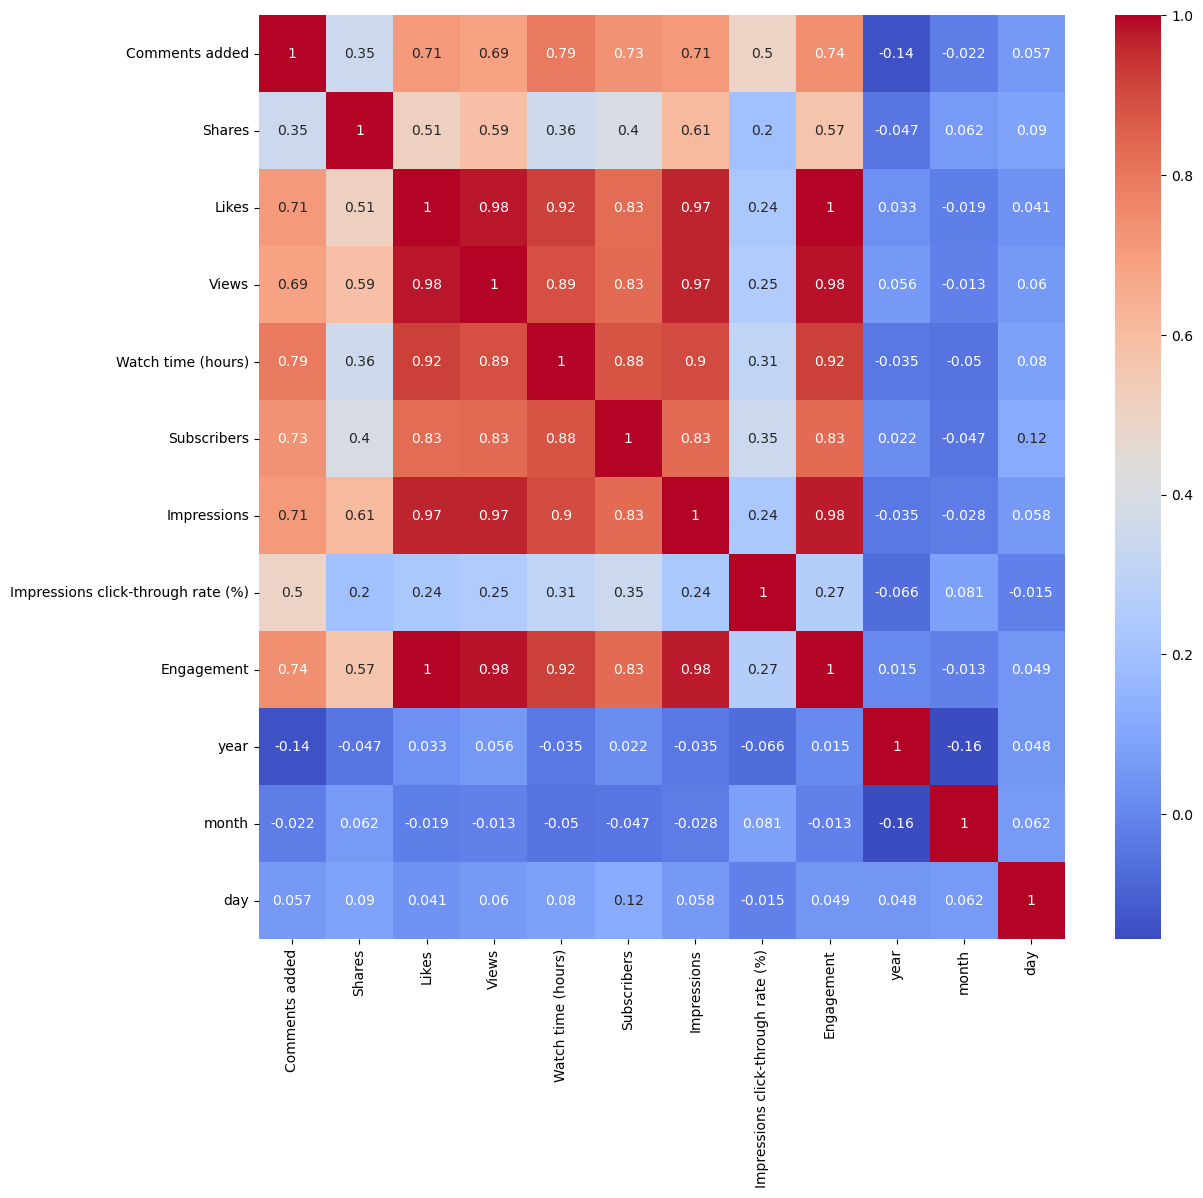

<Figure size 640x480 with 0 Axes>

In [78]:
features = df1.iloc[:,2:14]

# Check correlation matrix
plt.figure(figsize=(13,12))
corr_matrix = features.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
results_path = 'results.png'
plt.savefig(results_path)

In [79]:
df1['Video publish time'] = pd.to_datetime(df1['Video publish time'])

In [80]:
from scipy import stats
features = df1.iloc[:,2:14]
#remove outliers w/z-score
features = (np.abs(stats.zscore(features))>3).all(axis=1)

In [81]:
df1['subscribers_lag_1'] = df1['Subscribers'].shift(1)
df1['subscribers_lag_2'] = df1['Subscribers'].shift(2)
df1['subscribers_lag_3'] = df1['Subscribers'].shift(3)
df1['subscribers_lag_4'] = df1['Subscribers'].shift(4)
df1['subscribers_lag_5'] = df1['Subscribers'].shift(5)
df1['subscribers_lag_6'] = df1['Subscribers'].shift(6)
df1['subscribers_lag_7'] = df1['Subscribers'].shift(7)


In [82]:
df1['views_lag_1'] = df1['Views'].shift(1)
df1['views_lag_2'] = df1['Views'].shift(2)
df1['views_lag_3'] = df1['Views'].shift(3)
df1['views_lag_4'] = df1['Views'].shift(4)
df1['views_lag_5'] = df1['Views'].shift(5)
df1['views_lag_6'] = df1['Views'].shift(6)
df1['views_lag_7'] = df1['Views'].shift(7)

In [83]:
df1['subscribers_rolling_mean_7'] = df1['Subscribers'].rolling(7).mean()

In [84]:
df1['views_rolling_mean_7'] = df1['Views'].rolling(7).mean()

In [85]:
df1.isnull().sum()/len(df)*100

Video title                           0.000000
Video publish time                    0.000000
Comments added                        0.000000
Shares                                0.000000
Likes                                 0.000000
Views                                 0.000000
Watch time (hours)                    0.000000
Subscribers                           0.000000
Impressions                           0.000000
Impressions click-through rate (%)    0.000000
Engagement                            0.000000
year                                  0.000000
month                                 0.000000
day                                   0.000000
dayofweek                             0.000000
subscribers_lag_1                     0.425532
subscribers_lag_2                     0.851064
subscribers_lag_3                     1.276596
subscribers_lag_4                     1.702128
subscribers_lag_5                     2.127660
subscribers_lag_6                     2.553191
subscribers_l

In [86]:
df1['subscribers_lag_1'] = df1['subscribers_lag_1'].replace(np.nan,df1['subscribers_lag_1'].mean())
df1['subscribers_lag_2'] = df1['subscribers_lag_2'].replace(np.nan,df1['subscribers_lag_2'].mean())
df1['subscribers_lag_3'] = df1['subscribers_lag_3'].replace(np.nan,df1['subscribers_lag_3'].mean())
df1['subscribers_lag_4'] = df1['subscribers_lag_4'].replace(np.nan,df1['subscribers_lag_4'].mean())
df1['subscribers_lag_5'] = df1['subscribers_lag_5'].replace(np.nan,df1['subscribers_lag_5'].mean())
df1['subscribers_lag_6'] = df1['subscribers_lag_6'].replace(np.nan,df1['subscribers_lag_6'].mean())
df1['subscribers_lag_7'] = df1['subscribers_lag_7'].replace(np.nan,df1['subscribers_lag_7'].mean())

In [87]:
df1.isnull().sum()/len(df)*100

Video title                           0.000000
Video publish time                    0.000000
Comments added                        0.000000
Shares                                0.000000
Likes                                 0.000000
Views                                 0.000000
Watch time (hours)                    0.000000
Subscribers                           0.000000
Impressions                           0.000000
Impressions click-through rate (%)    0.000000
Engagement                            0.000000
year                                  0.000000
month                                 0.000000
day                                   0.000000
dayofweek                             0.000000
subscribers_lag_1                     0.000000
subscribers_lag_2                     0.000000
subscribers_lag_3                     0.000000
subscribers_lag_4                     0.000000
subscribers_lag_5                     0.000000
subscribers_lag_6                     0.000000
subscribers_l

In [88]:
df1['views_lag_1'] = df1['views_lag_1'].replace(np.nan,df1['views_lag_1'].mean())
df1['views_lag_2'] = df1['views_lag_2'].replace(np.nan,df1['views_lag_2'].mean())
df1['views_lag_3'] = df1['views_lag_3'].replace(np.nan,df1['views_lag_3'].mean())
df1['views_lag_4'] = df1['views_lag_4'].replace(np.nan,df1['views_lag_4'].mean())
df1['views_lag_5'] = df1['views_lag_5'].replace(np.nan,df1['views_lag_5'].mean())
df1['views_lag_6'] = df1['views_lag_6'].replace(np.nan,df1['views_lag_6'].mean())
df1['views_lag_7'] = df1['views_lag_7'].replace(np.nan,df1['views_lag_7'].mean())

In [89]:
df1['subscribers_rolling_mean_7'] = df1['subscribers_rolling_mean_7'].replace(np.nan,df1['subscribers_rolling_mean_7'].mean())
df1['views_rolling_mean_7']= df1['views_rolling_mean_7'].replace(np.nan,df1['views_rolling_mean_7'].mean())

In [90]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 1 to 255
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Video title                         235 non-null    object        
 1   Video publish time                  235 non-null    datetime64[ns]
 2   Comments added                      235 non-null    int64         
 3   Shares                              235 non-null    int64         
 4   Likes                               235 non-null    int64         
 5   Views                               235 non-null    int64         
 6   Watch time (hours)                  235 non-null    float64       
 7   Subscribers                         235 non-null    int64         
 8   Impressions                         235 non-null    int64         
 9   Impressions click-through rate (%)  235 non-null    float64       
 10  Engagement                     

In [91]:
# Select features
features = ['Comments added', 'Shares', 'Likes', 'Watch time (hours)', 'Impressions', 'Impressions click-through rate (%)', 
            'year', 'month', 'day', 'dayofweek',
            'subscribers_lag_1', 'subscribers_lag_2', 'subscribers_lag_3', 'subscribers_lag_4', 'subscribers_lag_5', 'subscribers_lag_6', 'subscribers_lag_7',
            'views_lag_1', 'views_lag_2', 'views_lag_3', 'views_lag_4', 'views_lag_5', 'views_lag_6', 'views_lag_7',
            'subscribers_rolling_mean_7','views_rolling_mean_7']

In [92]:
import lightgbm as lgb
x_data = df1[features]
y_out = df1['Subscribers']

# Split the data into training and testing sets
X_train, X_test, y_subs_train, y_subs_test = train_test_split(x_data, y_out, test_size=0.2, random_state=42)

lgb_model = lgb.LGBMRegressor()

params = {'num_leaves':[31,50],
'learning_rate': [0.001,0.05,0.1],
'n_estimators':[100,200,500],
'max_depth':[-1,10,20],
'min_child_samples':[20,50,100]
}

grid_search = GridSearchCV(estimator=lgb_model, param_grid=params, cv=3, n_jobs=-1, verbose=1, scoring='r2')
grid_search.fit(X_train,y_subs_train)

best_lgb_model = grid_search.best_estimator_

y_pred = best_lgb_model.predict(X_test)

#evaluate
mse_lgb = mean_squared_error(y_subs_test,y_pred)
r2_lgb = r2_score(y_subs_test,y_pred)
rmse_lgb = np.sqrt(mse_lgb)

print("Best LightGBM Model")
print('Root Mean Squared Error: ', rmse_lgb)
print('R-squared: ', r2_lgb)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


D:\Anaconda\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning:

invalid value encountered in cast



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 188, number of used features: 26
[LightGBM] [Info] Start training from score 1.090426
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

100%|██████████| 50/50 [00:49<00:00,  1.00trial/s, best loss: 0.931277943228031] 
Best parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Best Random Forest Model after Hyperopt Optimizations
Root Mean Squared Error:  1.0182775052589295
R-squared:  0.7668002471313974


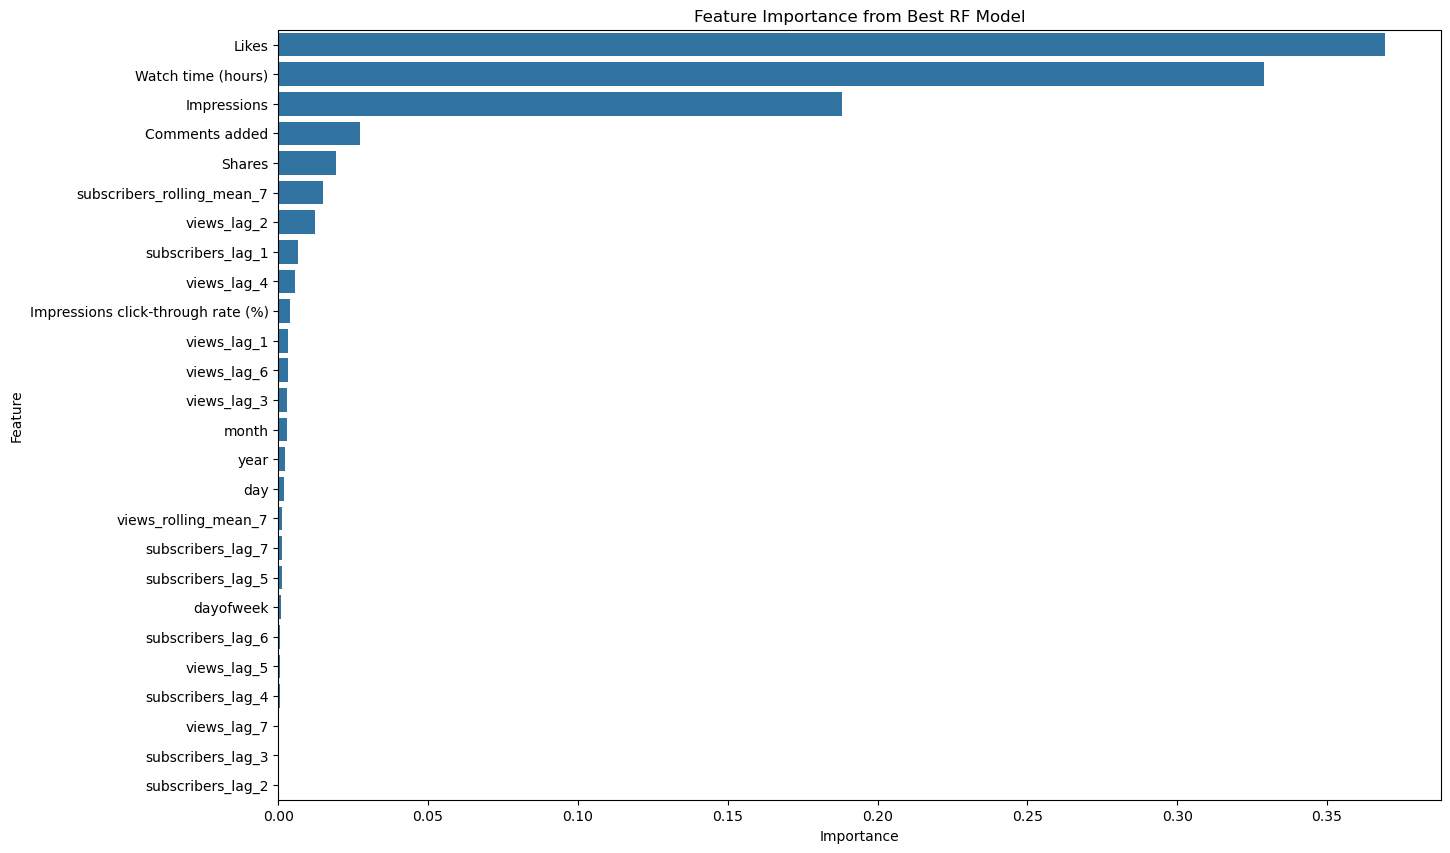

In [93]:
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
from sklearn.ensemble import RandomForestRegressor

features = ['Comments added', 'Shares', 'Likes', 'Watch time (hours)', 'Impressions', 'Impressions click-through rate (%)', 
            'year', 'month', 'day', 'dayofweek',
            'subscribers_lag_1', 'subscribers_lag_2', 'subscribers_lag_3', 'subscribers_lag_4', 'subscribers_lag_5', 'subscribers_lag_6', 'subscribers_lag_7',
            'views_lag_1', 'views_lag_2', 'views_lag_3', 'views_lag_4', 'views_lag_5', 'views_lag_6', 'views_lag_7',
            'subscribers_rolling_mean_7', 'views_rolling_mean_7']

x = df1[features]
y = df1['Subscribers']

# Normalize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

search_space = {
    'n_estimators': hp.choice('n_estimators', [100, 200, 500]),
    'max_depth': hp.choice('max_depth', [10, 20, 30, None]),
    'min_samples_split': hp.choice('min_samples_split', [2, 5, 10]),
    'min_samples_leaf': hp.choice('min_samples_leaf', [1, 2, 4]),
    'bootstrap': hp.choice('bootstrap', [True, False])
}
def objective(params):
    model = RandomForestRegressor(**params)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    return{'loss':mse,'status': STATUS_OK}

trials = Trials()
best_params = fmin(fn=objective,space=search_space,algo=tpe.suggest,max_evals=50,trials=trials)

#convert parameters to correct format
best_params['n_estimators'] = [100,200,500][best_params['n_estimators']]
best_params['max_depth'] = [10,20,30,None][best_params['max_depth']]
best_params['min_samples_split'] = [2,5,10][best_params['min_samples_split']]
best_params['min_samples_leaf'] = [1,2,4][best_params['min_samples_leaf']]
best_params['bootstrap'] = [True,False][best_params['bootstrap']]

print("Best parameters:", best_params)

best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(x_train,y_train)

#predict
y_pred = best_rf_model.predict(x_test)

#evaluate
mse_rf = mean_squared_error(y_test,y_pred)
r2_rf = r2_score(y_test,y_pred)
rmse_rf = np.sqrt(mse_rf)

print("Best Random Forest Model after Hyperopt Optimizations")
print('Root Mean Squared Error: ', rmse_rf)
print('R-squared: ', r2_rf)

#plot feature importance for best model
feature_importance = best_rf_model.feature_importances_
feature_names = x.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance',ascending = False)

plt.figure(figsize=(15,10))
sns.barplot(x='Importance',y='Feature',data=importance_df)
plt.title('Feature Importance from Best RF Model')
plt.savefig('Feature Importance.png',bbox_inches = 'tight')
plt.show()


100%|██████████| 100/100 [00:27<00:00,  3.67trial/s, best loss: 0.9331337121657893]
Best XGBoost parameters found: {'colsample_bytree': 0.5503446318754122, 'gamma': 4.186387335986632, 'learning_rate': 0.03897055903869513, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.727119818314055}
Best XGBoost Model after Hyperopt Optimization
Root Mean Squared Error: 0.965988463785044
R-squared: 0.7901351451873779


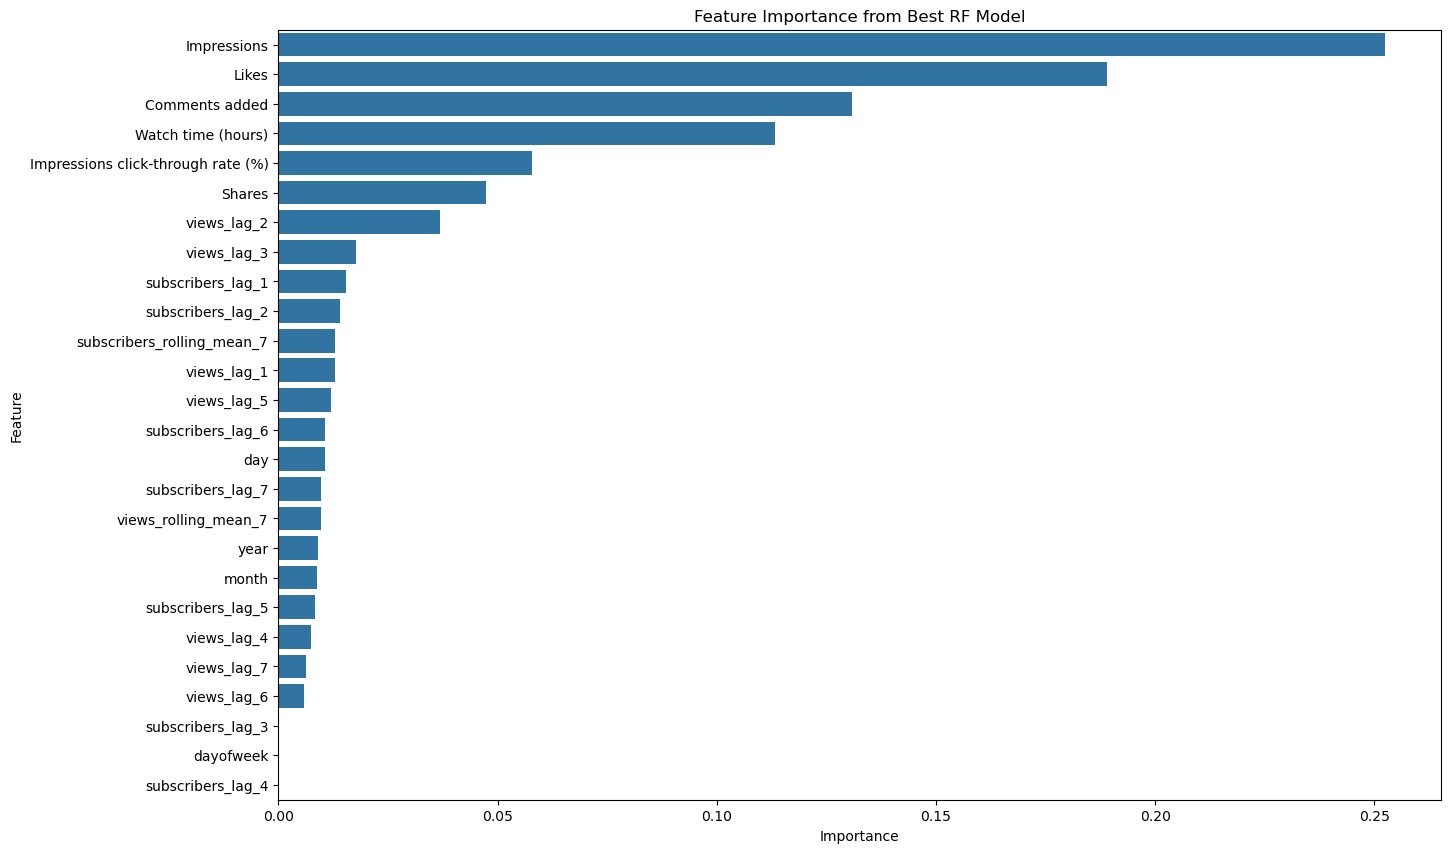

In [94]:
# Define the search space for XGBoost
xgb_search_space = {
    'n_estimators': hp.choice('n_estimators', [100, 200, 300, 500]),
    'max_depth': hp.choice('max_depth', [3, 5, 7, 10, 15]),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'gamma': hp.uniform('gamma', 0, 5),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
    'min_child_weight': hp.choice('min_child_weight', [1, 5, 10])
}

def xgb_objective(params):
    model = xgb.XGBRegressor(**params, objective='reg:squarederror', n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return {'loss': mse, 'status': STATUS_OK}

xgb_trials = Trials()
best_xgb_params = fmin(fn=xgb_objective, space=xgb_search_space, algo=tpe.suggest, max_evals=100, trials=xgb_trials)

# Convert hyperopt results to usable format
best_xgb_params['n_estimators'] = [100, 200, 300, 500][best_xgb_params['n_estimators']]
best_xgb_params['max_depth'] = [3, 5, 7, 10, 15][best_xgb_params['max_depth']]
best_xgb_params['min_child_weight'] = [1, 5, 10][best_xgb_params['min_child_weight']]

print("Best XGBoost parameters found:", best_xgb_params)

best_xgb_model = xgb.XGBRegressor(**best_xgb_params, objective='reg:squarederror', n_jobs=-1)
best_xgb_model.fit(x_train, y_train)

# Make predictions
y_pred = best_xgb_model.predict(x_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)

print("Best XGBoost Model after Hyperopt Optimization")
print("Root Mean Squared Error:", rmse_xgb)
print("R-squared:", r2_xgb)

#plot feature importance for best model
feature_importance = best_xgb_model.feature_importances_
feature_names = x.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance',ascending = False)

plt.figure(figsize=(15,10))
sns.barplot(x='Importance',y='Feature',data=importance_df)
plt.title('Feature Importance from Best RF Model')
plt.savefig('Feature Importance2.png',bbox_inches = 'tight')
plt.show()


In [193]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Custom scorer for MAPE (ensure no division by zero)
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-7))) * 100

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
cv_rmse = -cross_val_score(best_xgb_model, X_scaled, y, scoring='neg_root_mean_squared_error', cv=kf)
cv_r2 = cross_val_score(best_xgb_model, X_scaled, y, scoring='r2', cv=kf)
cv_mae = -cross_val_score(best_xgb_model, X_scaled, y, scoring='neg_mean_absolute_error', cv=kf)
cv_mape = -cross_val_score(best_xgb_model, X_scaled, y, scoring=make_scorer(mape, greater_is_better=False), cv=kf)

print("Cross-Validated RMSE:", cv_rmse.mean())
print("Cross-Validated R-squared:", cv_r2.mean())
print("Cross-Validated MAE:", cv_mae.mean())
print("Cross-Validated MAPE:", cv_mape.mean())

Cross-Validated RMSE: 1.886298653578042
Cross-Validated R-squared: 0.6385615348815918
Cross-Validated MAE: 0.8380834241298603
Cross-Validated MAPE: 243612690.08825168


In [207]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer, r2_score
import xgboost as xgb

# Check for negative values in the target variable and replace them with a small positive value (e.g., 1)
y = y.copy()  # Make a copy of the target variable to avoid the warning
y[y < 0] = 1

# Log transformation of the target variable
y_log = np.log1p(y)  # log1p is log(1 + x) to handle zeros

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.2, random_state=42)

# Define and fit the model
best_xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_log = best_xgb_model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # inverse log transformation
y_test_exp = np.expm1(y_test)  # inverse log transformation of the test data

# Print some values to inspect
print("y_test (first 10 values):", y_test_exp[:10])
print("y_pred (first 10 values):", y_pred[:10])

# Evaluate the model using root mean squared error
rmse = mean_squared_error(y_test_exp, y_pred, squared=False)
r2 = r2_score(y_test_exp, y_pred)
mae = mean_absolute_error(y_test_exp, y_pred)

# Correct MAPE calculation
non_zero_mask = y_test_exp != 0
mape = np.mean(np.abs((y_test_exp[non_zero_mask] - y_pred[non_zero_mask]) / y_test_exp[non_zero_mask])) * 100

print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)

# Custom scorer for MAPE (ensure no division by zero)
def mape(y_true, y_pred):
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

mape_scorer = make_scorer(mape, greater_is_better=False)

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation with log-transformed target
cv_rmse = -cross_val_score(best_xgb_model, X_scaled, y_log, scoring='neg_root_mean_squared_error', cv=kf)
cv_r2 = cross_val_score(best_xgb_model, X_scaled, y_log, scoring='r2', cv=kf)
cv_mae = -cross_val_score(best_xgb_model, X_scaled, y_log, scoring='neg_mean_absolute_error', cv=kf)
cv_mape = -cross_val_score(best_xgb_model, X_scaled, y_log, scoring=mape_scorer, cv=kf)

print("Cross-Validated Root Mean Squared Error:", cv_rmse.mean())
print("Cross-Validated R-squared:", cv_r2.mean())
print("Cross-Validated Mean Absolute Error:", cv_mae.mean())
print("Cross-Validated Mean Absolute Percentage Error:", cv_mape.mean())


y_test (first 10 values): 70     0.0
226    1.0
193    2.0
10     0.0
130    0.0
110    0.0
213    0.0
94     0.0
243    0.0
16     1.0
Name: Subscribers, dtype: float64
y_pred (first 10 values): [0.16945933 0.16945933 0.78792393 0.22535276 0.24437182 0.24811763
 0.16945933 0.22535276 0.16945933 0.48704717]
Root Mean Squared Error: 1.5932308649678437
R-squared: 0.4291089841894341
Mean Absolute Error: 0.8276699822633824
Mean Absolute Percentage Error: 64.8841937087358


D:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



Cross-Validated Root Mean Squared Error: 0.44558857214162356
Cross-Validated R-squared: 0.506854298384921
Cross-Validated Mean Absolute Error: 0.3316702898705193
Cross-Validated Mean Absolute Percentage Error: 52.342938449896266


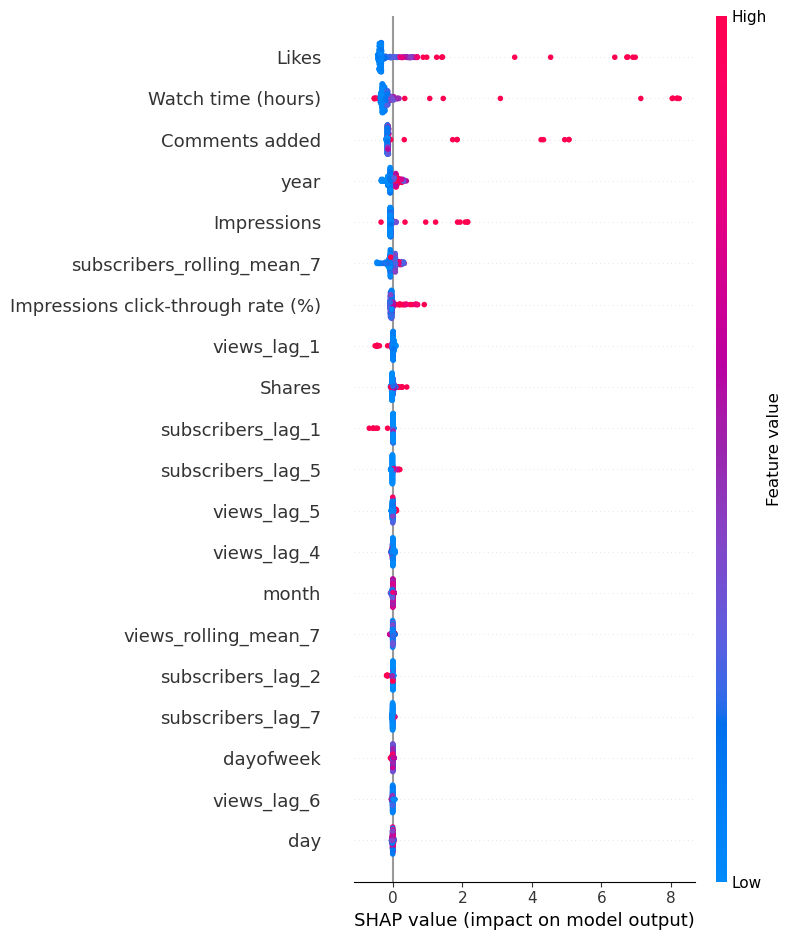

In [209]:
import shap

#fit model fot SHAP values calcualtion
best_xgb_model.fit(x_scaled,y)

#calculation of SHAP values
explainer = shap.Explainer(best_xgb_model)
shap_values = explainer(x_scaled)

#plot SHAP
shap.summary_plot(shap_values,x,feature_names=features)